# Weather in Albury, Australia

 This dataset contains comprehensive weather observations collected in Albury, Australia, spanning a 10-year period from 2008 to 2017. It includes daily weather measurements that are valuable for climate analysis, weather prediction modeling, and data science projects related to environmental conditions.

### Dataset Columns:
Date: The observation date (format: dd/mm/yyyy).

Location: The weather station location in Australia.

MinTemp: Minimum temperature (°C) recorded that day.

MaxTemp: Maximum temperature (°C) recorded that day.

Rainfall: Amount of rainfall (mm) in the 24 hours to 9 a.m. the next day.

Evaporation: The amount of water (mm) that evaporated (measured via pan evaporation) in the 24 hours to 9 a.m. (may contain missing values).

Sunshine: Number of hours of bright sunshine during the day (may contain missing values).

WindGustDir: Direction of the strongest wind gust during the day.

WindGustSpeed: Speed (km/h) of the strongest wind gust during the day.

WindDir9am: Wind direction at 9 a.m.

WindDir3pm: Wind direction at 3 p.m.

WindSpeed9am: Wind speed (km/h) at 9 a.m.

WindSpeed3pm: Wind speed (km/h) at 3 p.m.

Humidity9am: Relative humidity (%) at 9 a.m.

Humidity3pm: Relative humidity (%) at 3 p.m.

Pressure9am: Atmospheric pressure (hPa) at 9 a.m.

Pressure3pm: Atmospheric pressure (hPa) at 3 p.m.

Cloud9am: Cloud cover at 9 a.m. (scale: 0–8, where 8 means full cloud cover).

Cloud3pm: Cloud cover at 3 p.m. (same scale as above).

Temp9am: Temperature (°C) at 9 a.m.

Temp3pm: Temperature (°C) at 3 p.m.

RainToday: Whether it rained today (Yes/No — based on if Rainfall > 1 mm).

RainTomorrow: The target variable — whether it will rain the next day (Yes/No).

The **`RainTomorrow`** column is the target variable in this dataset. It indicates whether it will rain the next day — represented as **"Yes"** or **"No"**.

## Imports

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Loading

In [79]:
df = pd.read_csv('rainInAustralia.csv')

In [80]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Exploratory Data Analysis (EDA)

### *Data Cleaning*


In [81]:
df.isnull().sum()

Date                0
Location            0
MinTemp            11
MaxTemp            11
Rainfall           29
Evaporation      3040
Sunshine         3040
WindGustDir        32
WindGustSpeed      32
WindDir9am        525
WindDir3pm         46
WindSpeed9am        9
WindSpeed3pm       11
Humidity9am         9
Humidity3pm         8
Pressure9am         5
Pressure3pm         8
Cloud9am         1751
Cloud3pm         1613
Temp9am             9
Temp3pm             8
RainToday          29
RainTomorrow       29
dtype: int64

In [82]:
df.dropna(axis=1,thresh = np.floor(len(df.columns)*0.5),inplace=True)

In [83]:
df.isnull().sum()

Date                0
Location            0
MinTemp            11
MaxTemp            11
Rainfall           29
WindGustDir        32
WindGustSpeed      32
WindDir9am        525
WindDir3pm         46
WindSpeed9am        9
WindSpeed3pm       11
Humidity9am         9
Humidity3pm         8
Pressure9am         5
Pressure3pm         8
Cloud9am         1751
Cloud3pm         1613
Temp9am             9
Temp3pm             8
RainToday          29
RainTomorrow       29
dtype: int64

In [84]:
df.fillna(df.mean(numeric_only=True),inplace=True)

In [85]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir       32
WindGustSpeed      0
WindDir9am       525
WindDir3pm        46
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday         29
RainTomorrow      29
dtype: int64

In [86]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [87]:
df['Month'] = df['Date'].dt.month

In [88]:
df.drop(['Location'],inplace=True,axis=1)

In [89]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

In [90]:
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

In [91]:
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [92]:
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

In [93]:
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [94]:
df.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64

### *Descriptive Statistics*

In [95]:
# mean of each column
df.mean(numeric_only=True)

MinTemp             9.530604
MaxTemp            22.640872
Rainfall            1.914115
WindGustSpeed      32.977394
WindSpeed9am        8.211151
WindSpeed3pm       14.382965
Humidity9am        74.070604
Humidity3pm        47.869393
Pressure9am      1018.369621
Pressure3pm      1015.760752
Cloud9am            6.391001
Cloud3pm            5.406447
Temp9am            14.361135
Temp3pm            21.373780
Month               6.410855
dtype: float64

In [96]:
# median of each column
df.median(numeric_only=True)

MinTemp             9.100000
MaxTemp            22.000000
Rainfall            0.000000
WindGustSpeed      31.000000
WindSpeed9am        7.000000
WindSpeed3pm       13.000000
Humidity9am        76.000000
Humidity3pm        47.000000
Pressure9am      1018.400000
Pressure3pm      1015.600000
Cloud9am            6.391001
Cloud3pm            5.406447
Temp9am            14.100000
Temp3pm            20.600000
Month               6.000000
dtype: float64

In [97]:
# mode of each column
df.mode(numeric_only=True)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
0,10.0,14.9,0.0,28.0,0.0,11.0,100.0,47.0,1018.6,1015.6,6.391001,5.406447,7.6,14.0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.7,NaN,3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,5


In [98]:
# standard deviation of each column
df.std(numeric_only=True)

MinTemp           6.058490
MaxTemp           7.780804
Rainfall          6.200217
WindGustSpeed    13.307566
WindSpeed9am      6.723341
WindSpeed3pm      7.189481
Humidity9am      17.409937
Humidity3pm      19.791296
Pressure9am       7.355815
Pressure3pm       7.103994
Cloud9am          1.554424
Cloud3pm          1.940058
Temp9am           6.360354
Temp3pm           7.509495
Month             3.447717
dtype: float64

<Axes: >

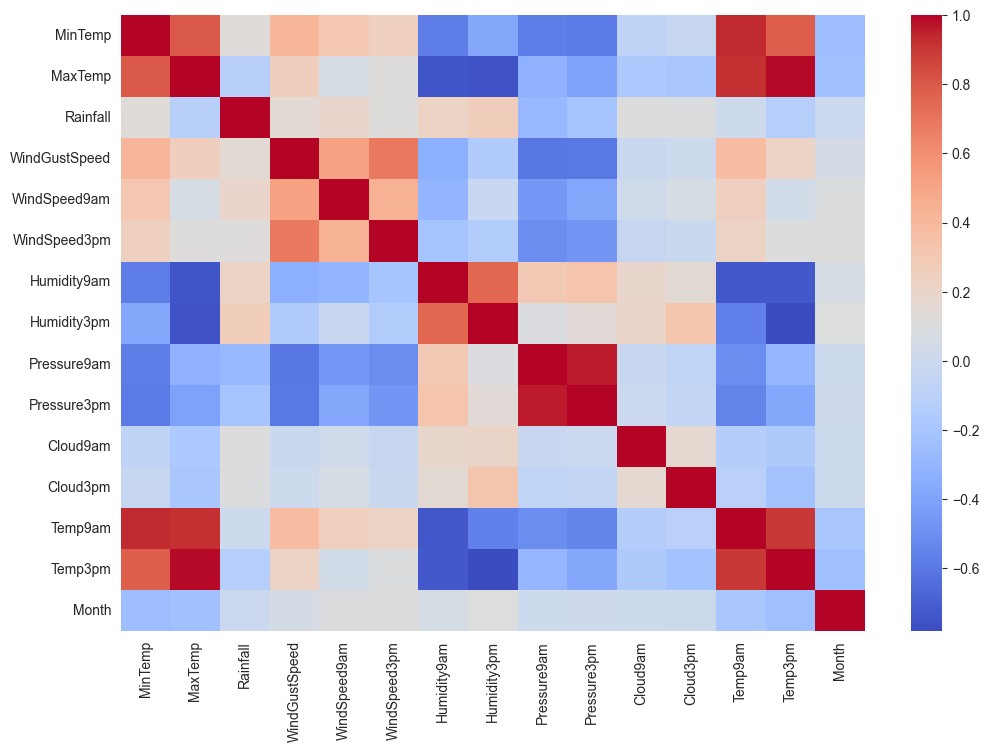

In [99]:
# correlation heatmap
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm')

### *Univariate and Bivariate Analysis*

Rainfall Distribution – Histogram showing how rainfall is spread out (mostly low, with some extreme days).

In [100]:
px.histogram(df,x='Rainfall')

Monthly Rainfall Trends – Boxplot showing seasonal rainfall patterns across months.

In [101]:
px.box(df,x='Month',y='Rainfall')

Max Temperature vs Rainfall (by RainTomorrow) – Scatterplot showing relationship and rain likelihood.

In [102]:
px.scatter(df,x='MaxTemp',y='Rainfall',color='RainTomorrow')

Wind Gust Speed Distribution – Histogram indicating typical and extreme wind gusts.

In [103]:
px.histogram(df,x='WindGustSpeed')

Humidity at 3pm vs RainTomorrow – Boxplot showing rain is more likely with higher afternoon humidity.

In [104]:
px.box(df,x='RainTomorrow',y='Humidity3pm')

RainTomorrow Class Distribution – Bar chart showing the dataset is slightly imbalanced (more “No” than “Yes”).

In [105]:
px.bar(df,x='RainTomorrow',color='RainTomorrow')

RainToday vs RainTomorrow - Grouped bar chart to see if rain today affects tomorrow's rain.

In [106]:
import plotly.graph_objects as go

In [107]:
rain_report = pd.crosstab(df['RainToday'],df['RainTomorrow'])

In [108]:
fig = go.Figure(data=[
    go.Bar(name='No', x=rain_report.index, y=rain_report['No']),
    go.Bar(name='Yes', x=rain_report.index, y=rain_report['Yes'])
])

# Update layout
fig.update_layout(
    barmode='group',
    title='RainToday vs RainTomorrow',
    xaxis_title='RainToday',
    yaxis_title='Count',
    legend_title='Rain Tomorrow'
)

fig.show()

### *Advanced Visualization*

Seasonal time series decomposition helps break down rainfall data into:

-Trend (long-term progression

-Seasonality (repeating patterns over time)

-Residuals (noise or irregularities)

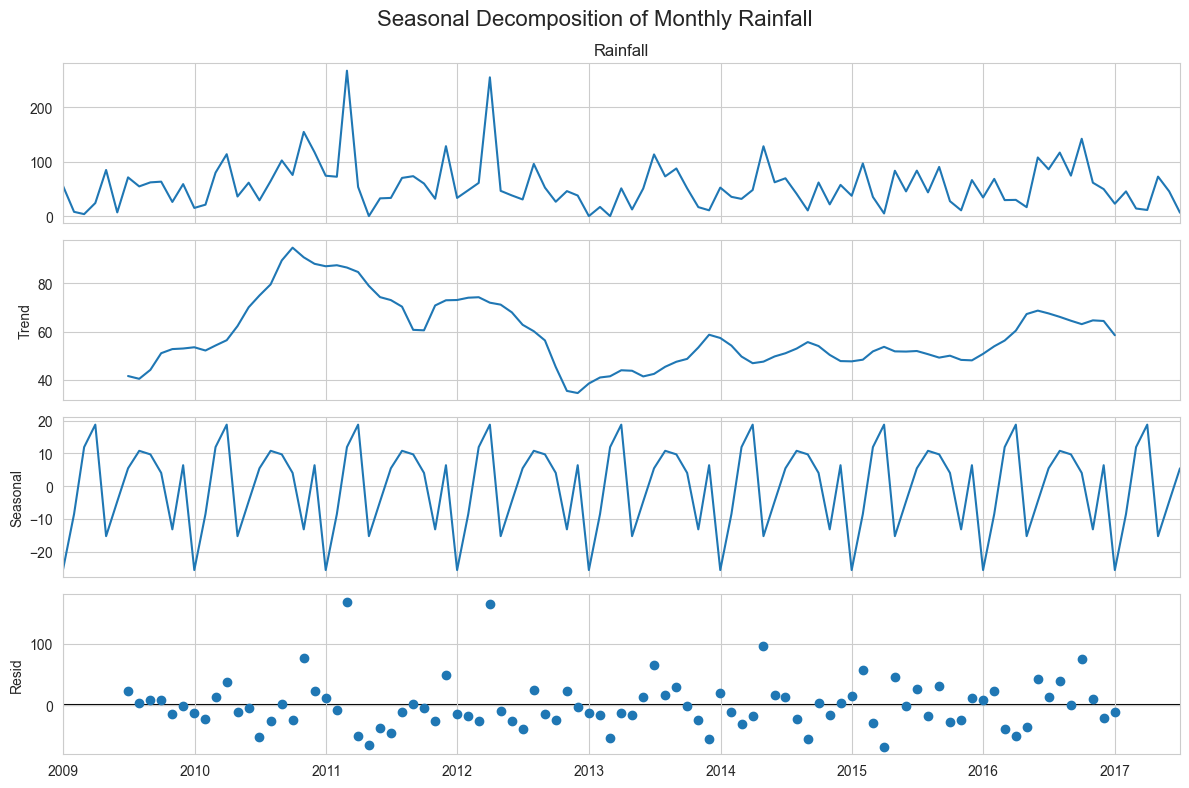

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_monthly = df.set_index('Date').resample('ME').sum()

result = seasonal_decompose(df_monthly['Rainfall'], model='additive', period=12)


plt.rcParams.update({'figure.figsize': (12, 8)})
result.plot()
plt.suptitle('Seasonal Decomposition of Monthly Rainfall', fontsize=16)
plt.tight_layout()
plt.show()


## Machine Learning Modeling

In [110]:
df.drop(['WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [111]:
df.set_index('Date',inplace=True)

In [114]:
df = pd.get_dummies(df, columns=['WindGustDir'], drop_first=True, dtype=int)

In [115]:
#label encoding for RainToday and RainTomorrow
df['RainToday'] = df['RainToday'].map({'No':0,'Yes':1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No':0,'Yes':1})

In [116]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,1,0
2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,1,0,0


In [117]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### *Logistic Regression*

In [119]:
#train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [120]:
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [121]:
#predict the target variable
predicted = model.predict(X_test_scaled)

In [122]:
#evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted)
print('Accuracy:', accuracy)

Accuracy: 0.8706140350877193


In [125]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       711
           1       0.75      0.62      0.68       201

    accuracy                           0.87       912
   macro avg       0.82      0.78      0.80       912
weighted avg       0.86      0.87      0.87       912



In [124]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[670,  41],
       [ 77, 124]])

In [142]:
#save the model
import joblib as jl
jl.dump(model, 'rain_model.pkl')

['rain_model.pkl']

### *Random Forest*

In [133]:
#train the model
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()

In [134]:
model2.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [135]:
#predict the target variable
predicted = model2.predict(X_test_scaled)

In [136]:
#evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted)
print('Accuracy:', accuracy)

Accuracy: 0.8640350877192983


In [137]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       711
           1       0.77      0.54      0.64       201

    accuracy                           0.86       912
   macro avg       0.83      0.75      0.78       912
weighted avg       0.86      0.86      0.85       912



In [138]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[679,  32],
       [ 92, 109]])

In [140]:
#save the model

jl.dump(model2, 'rain_model2.pkl')

['rain_model2.pkl']